In [1]:
import pandas as pd
sentiment_scores = pd.read_csv('overall_sentiment.csv')
tweets_by_hashtag = pd.read_csv('tweets_by_hashtag_new.csv')
tweets_by_keyword = pd.read_csv('tweets_by_keywords_new.csv')

In [2]:
# frequency of each 
frequencies = sentiment_scores.iloc[:, 0].value_counts()
#turn the series into dictionary to feed into wordcloud
frequencies = frequencies.to_dict()
frequencies

{'#BlackFriday': 1000,
 'Climate Change': 1000,
 'Cyber Monday': 608,
 '#ClimateChange': 475,
 'Buy Local': 459,
 'Sustainability': 412,
 '#SmallBusinessSaturday': 337,
 'No Black Friday': 334,
 'Black Friday': 284,
 '#CyberMonday': 235,
 'Over Production': 232,
 '#Sustainability': 218,
 'No Sales': 182,
 '#BuyLocal': 179,
 'Small Business Saturday': 135,
 'Second Hand': 134,
 'Recycle': 79,
 'Buy Less': 73,
 'Diabetes Canada': 63,
 'Salvation Army': 62,
 '#NetZero': 60,
 'Blue Box': 53,
 'Zero Waste': 48,
 'NetZero': 47,
 '#CircularEconomy': 35,
 'Locally Made': 34,
 '#SlowFashion': 34,
 'Circular Economy': 29,
 'Repurposing': 29,
 'Textiles': 27,
 'Sustainable Fashion': 26,
 '#ZeroWaste': 25,
 'Sustainable Development Goals': 23,
 '#SustainableFashion': 23,
 'Value Village': 22,
 'Fast Fashion': 21,
 '#Recycle': 14,
 '#EcoFashion': 12,
 'Donation Bins': 8,
 'Waste Reduction': 8,
 'Textile Industry': 7,
 'Re-use': 7,
 'WasteReduction': 7,
 'Eco Fashion': 6,
 'Upcycling': 6,
 'FTA': 5,

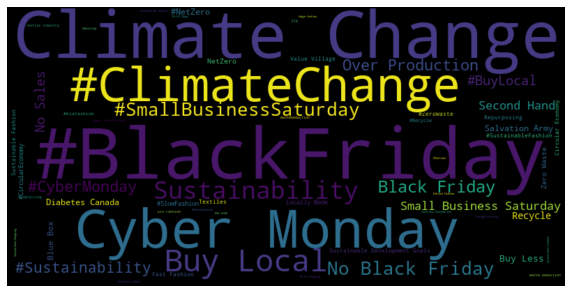

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
%matplotlib inline

wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(frequencies)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud.png')
plt.show()

In [6]:
import re

def getWords(text):
    return re.compile('\w+').findall(text)

#turn mentioned hashtags column into list 
#append the query hashtag to the list and add it to a new column at the end
tweets_by_hashtag['hashtags'] = tweets_by_hashtag['hashtags'].apply(lambda x: getWords(x))
tweets_by_hashtag['hashtag'] = tweets_by_hashtag['hashtag'].apply(lambda x: x.strip('#'))
tweets_by_hashtag['hashtags_list'] = tweets_by_hashtag.apply(lambda x: x['hashtags'] + [x['hashtag']], axis=1)
tweets_by_hashtag = tweets_by_hashtag.drop('hashtags', axis=1)
tweets_by_hashtag = tweets_by_hashtag.rename(columns = {'hashtags_list':'hashtags'})

tweets_by_hashtag


,hashtag,tweet,timestamp,user_ID,user_gender,user_location,num_followers,num_retweets,num_favourites,entities,hashtags
0,BlackFriday,RT @LouisBusch: It's been over two years since...,2020-11-28 23:59:25,1092973745935970304,female,"Mississauga, Ontario",83,39,0,"{'DATE': 'two years', 'ORG': 'OAP'}",[BlackFriday]
1,BlackFriday,RT @TorontoUltra: 🚨 #BlackFriday GIVEAWAY 🚨\n\...,2020-11-28 23:45:56,189187543,male,Toronto,215,103,0,{'CARDINAL': '#'},"[BlackFriday, BlackFriday]"
2,BlackFriday,🎇𝚈𝚘𝚞 𝚆𝚘𝚗'𝚝 𝙵𝚒𝚗𝚍 𝙱𝚎𝚝𝚝𝚎𝚛 𝙳𝚎𝚊𝚕𝚜 𝙰𝚗𝚢𝚠𝚑𝚎𝚛𝚎....🎇\n\n...,2020-11-28 23:30:44,815802529384566784,male,"Brampton, ON, Canada",159,0,0,"{'QUANTITY': '#blackfridaysale', 'PRODUCT': '#'}","[blackfridaysale, blackfriday, BlackFriday]"
3,BlackFriday,RT @LouisBusch: It's been over two years since...,2020-11-28 23:29:18,791638976,female,"Ontario, Canada",1652,39,0,"{'DATE': 'two years', 'ORG': 'OAP'}",[BlackFriday]
4,BlackFriday,RT @LouisBusch: It's been over two years since...,2020-11-28 23:27:29,23130850,female,"Courtice, Ontario, Canada",1302,39,0,"{'DATE': 'two years', 'ORG': 'OAP'}",[BlackFriday]
5,BlackFriday,RT @blogTO: People are lining up for hours out...,2020-11-28 23:18:25,1279818420943564802,female,Planet Earth,18,443,0,"{'TIME': 'hours', 'ORG': 'Vaughan Mills'}","[Toronto, BlackFriday]"
6,BlackFriday,RT @TorontoUltra: 🚨 #BlackFriday GIVEAWAY 🚨\n\...,2020-11-28 23:17:15,35157043,female,my padded lil room so soft,81,103,0,{'CARDINAL': '#'},"[BlackFriday, BlackFriday]"
7,BlackFriday,RT @trishstratuscom: #BlackFriday deals contin...,2020-11-28 23:10:56,84405358,female,lioliciousville,819,10,0,"{'CARDINAL': '#', 'ORG': 'BlackFriday', 'WORK_...","[BlackFriday, BlackFriday]"
8,BlackFriday,Bundle me up ! \n\nhttps://t.co/jkG15iTHyK \n\...,2020-11-28 23:09:35,1184673978876616705,female,"Toronto, Ontario",13,0,0,"{'CARDINAL': '#', 'PERSON': 'BlackFriday', 'MO...","[BlackFriday, PinkFridayAnniversary, PinkFrida..."
9,BlackFriday,RT @djirdehh: A couple of us from the Black @ ...,2020-11-28 23:02:01,2653575416,male,NaN,196,78,0,{'ORG': 'Black @'},[BlackFriday]


In [7]:
#reorganize the dataframe so that the hashtags column lines up wiht the other dataframe

tweets_by_keyword['hashtags'] = tweets_by_keyword['hashtags'].apply(lambda x: getWords(x))
tweets_by_keyword = tweets_by_keyword.rename(columns = {'hashtags_list':'hashtags'})
hashtags_col = pd.DataFrame(tweets_by_keyword['hashtags'])
tweets_by_keyword = tweets_by_keyword.drop('hashtags', axis=1)
tweets_by_keyword = tweets_by_keyword.join(hashtags_col)
tweets_by_keyword

,keyword,tweet,timestamp,user_ID,user_gender,user_location,num_followers,num_retweets,num_favourites,entities,hashtags
0,Black Friday,RT @amaabarwuah: BeSilk’d Black Friday Mega sa...,2020-11-29 23:52:22,355068155,female,the library,438,6,0,"{'EVENT': 'BeSilkd Black Friday Mega', 'TIME':...",[]
1,Black Friday,So I was on the @Indochino website for the fir...,2020-11-29 23:51:43,880124974874460160,male,"Toronto, Ontario",17,1,1,"{'NORP': '@Indochino', 'ORDINAL': 'first', 'EV...",[]
2,Black Friday,what’s black friday w/o Cyber Monday SAVE EVEN...,2020-11-29 23:49:30,1074931765196787712,female,"Toronto, Ontario",630,2,0,{'DATE': 'Monday'},[]
3,Black Friday,RT @TorontoUltra: 🚨 #BlackFriday GIVEAWAY 🚨\n\...,2020-11-29 23:48:27,821069611185672197,male,NaN,56,114,0,{'CARDINAL': '#'},[BlackFriday]
4,Black Friday,RT @BarrysPremium: Black Friday Blowout\nShine...,2020-11-29 23:47:47,3344156512,male,"Hamilton, Ontario",3819,17,0,"{'ORG': 'RT', 'EVENT': 'Black Friday Blowout',...",[]
5,Black Friday,Lightest black Friday in a while,2020-11-29 23:45:39,280142784,female,"Toronto, Ontario",305,0,0,{'DATE': 'Friday'},[]
6,Black Friday,RT @LyzabethLopez: 🖤🖤🖤 BLACK FRIDAY SALE!!! AL...,2020-11-29 23:44:45,417587987,female,"Queens, NY",270,3,0,"{'MONEY': '47', 'ORG': 'Reg', 'PERCENT': '50%'...",[]
7,Black Friday,Our Black Friday sales is extended for 1 more ...,2020-11-29 23:39:09,254244274,male,Toronto,2021,0,0,"{'EVENT': 'Black Friday', 'DATE': 'this weekend'}",[]
8,Black Friday,RT @danielhkwan: My #TTRPG design work is on s...,2020-11-29 23:35:28,2758944956,male,London,255,31,0,"{'ORG': 'TTRPG', 'NORP': 'Chinese'}","[TTRPG, DnD, OSR]"
9,Black Friday,RT @TorontoUltra: 🚨 #BlackFriday GIVEAWAY 🚨\n\...,2020-11-29 23:26:10,372591327,male,NaN,7,114,0,{'CARDINAL': '#'},[BlackFriday]


In [56]:
from collections import Counter
from itertools import combinations

#combine both datasets together and get only the hashtags column 
all_tweets = pd.concat([tweets_by_keyword.rename(columns={'keyword':'query'}), tweets_by_hashtag.rename(columns={'hashtag':'query'})]).reset_index(drop=True) 
hashtags = all_tweets['hashtags'].to_list()

#gets list with more than one hashtag and drop any duplicates
hashtags_list = []
for l in hashtags:
    if len(l) > 1:
        hashtags_list.append(l)
for i in range(len(hashtags_list)):
    hashtags_list[i] = list(set(hashtags_list[i]))


#get most frequent combinations of hashtags 
d  = Counter()
for sub in hashtags_list:
    if len(hashtags_list) < 2:
        continue
    sub.sort()
    for comb in combinations(sub,2):
        d[comb] += 1
d.most_common()

[(('ClimateChange', 'climatechange'), 201),
 (('BlackFriday', 'Toronto'), 137),
 (('BlackFriday', 'CyberMonday'), 108),
 (('cc', 'climatechange'), 71),
 (('ClimateChange', 'cc'), 70),
 (('BlackFriday', 'blackfriday'), 51),
 (('BuyLocal', 'buylocal'), 36),
 (('climatechange', 'climatecrisis'), 30),
 (('cities', 'housing'), 27),
 (('cities', 'transit'), 25),
 (('housing', 'transit'), 25),
 (('climatechange', 'netzero'), 25),
 (('climatecrisis', 'netzero'), 25),
 (('Sustainability', 'infographic'), 24),
 (('socialenterprise', 'socialimpact'), 23),
 (('socialenterprise', 'sustainability'), 23),
 (('socialimpact', 'sustainability'), 23),
 (('eco', 'sustainablefashion'), 22),
 (('Sustainability', 'sustainability'), 22),
 (('GreeningGovernment', 'netzero'), 20),
 (('NetZero', 'netzero'), 20),
 (('BlackFriday', 'BlackFriday2020'), 19),
 (('climatechange', 'socialenterprise'), 18),
 (('climatechange', 'socialimpact'), 18),
 (('climatechange', 'sustainability'), 18),
 (('business', 'engage'), 17